1. Generate data and convert it to a pandas DataFrame

In [14]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.2, random_state=150)

2. Basic Data Visualization

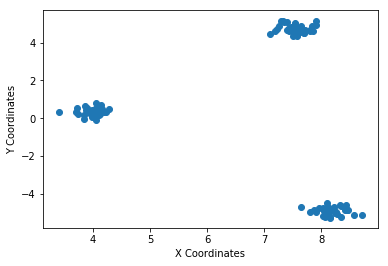

In [15]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

3. Using scikit-learn to perform K-Means clustering

In [16]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=150).fit(X)

4. Visualize and evaluate the results

In [17]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 7.53879732,  4.7394798 ],
       [ 8.17155039, -4.91690683],
       [ 3.98648162,  0.36868262]])

In [18]:
# Get the cluster labels
kmeans.labels_

array([0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0])

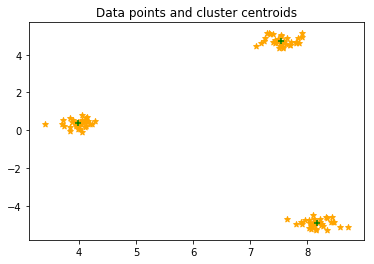

In [19]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1], c='orange', marker='*')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', marker='+')
plt.title('Data points and cluster centroids')
plt.show()

In [20]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.9372550446162252


6. Determining the value of K using silhouette_score

In [16]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=150)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)

# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()